In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

import os
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

--2023-11-19 18:45:15--  https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 2606:4700:20::ac43:4695, 2606:4700:20::681a:321, 2606:4700:20::681a:221, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|2606:4700:20::ac43:4695|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70702765 (67M) [application/zip]
Saving to: 'cats_and_dogs.zip.1'

cats_and_dogs.zip.1 100%[===================>]  67.43M  45.0MB/s    in 1.5s    

2023-11-19 18:45:17 (45.0 MB/s) - 'cats_and_dogs.zip.1' saved [70702765/70702765]

Archive:  cats_and_dogs.zip
replace cats_and_dogs/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
# 3
train_image_generator =ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(train_dir,target_size=(IMG_HEIGHT,IMG_WIDTH),batch_size=batch_size,class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(validation_dir,target_size=(IMG_HEIGHT,IMG_WIDTH),batch_size=batch_size,class_mode='binary')
test_data_gen = test_image_generator.flow_from_directory(test_dir,classes=["."],target_size=(IMG_HEIGHT,IMG_WIDTH),batch_size=batch_size,shuffle=False, class_mode='binary')

NameError: name 'ImageDataGenerator' is not defined

# New Section

In [2]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

NameError: name 'train_data_gen' is not defined

In [ ]:
# 5
train_image_generator =ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


Found 2000 images belonging to 2 classes.


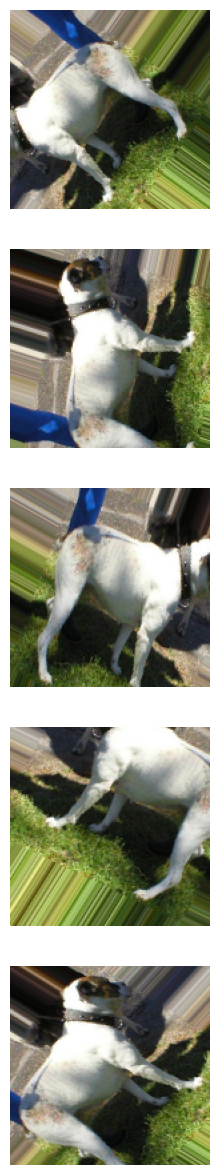

In [ ]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [ ]:
# 7
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
# 8
history = model.fit(train_data_gen,epochs=35,steps_per_epoch=total_train//batch_size, validation_data=val_data_gen,validation_steps=total_val//batch_size)

Epoch 1/35
15/15 [==============================] - 17s 1s/step - loss: 0.7340 - accuracy: 0.5940 - val_loss: 0.7336 - val_accuracy: 0.5022
Epoch 2/35
15/15 [==============================] - 17s 1s/step - loss: 0.7332 - accuracy: 0.6106 - val_loss: 0.7395 - val_accuracy: 0.5011
Epoch 3/35
15/15 [==============================] - 18s 1s/step - loss: 0.7087 - accuracy: 0.6223 - val_loss: 0.7163 - val_accuracy: 0.5067
Epoch 4/35
15/15 [==============================] - 18s 1s/step - loss: 0.7131 - accuracy: 0.6143 - val_loss: 0.7151 - val_accuracy: 0.4978
Epoch 5/35
15/15 [==============================] - 17s 1s/step - loss: 0.7114 - accuracy: 0.6084 - val_loss: 0.7111 - val_accuracy: 0.4989
Epoch 6/35
15/15 [==============================] - 23s 2s/step - loss: 0.6882 - accuracy: 0.6368 - val_loss: 0.7215 - val_accuracy: 0.4978
Epoch 7/35
15/15 [==============================] - 17s 1s/step - loss: 0.6939 - accuracy: 0.6389 - val_loss: 0.6848 - val_accuracy: 0.5078
Epoch 8/35
15/15 [==

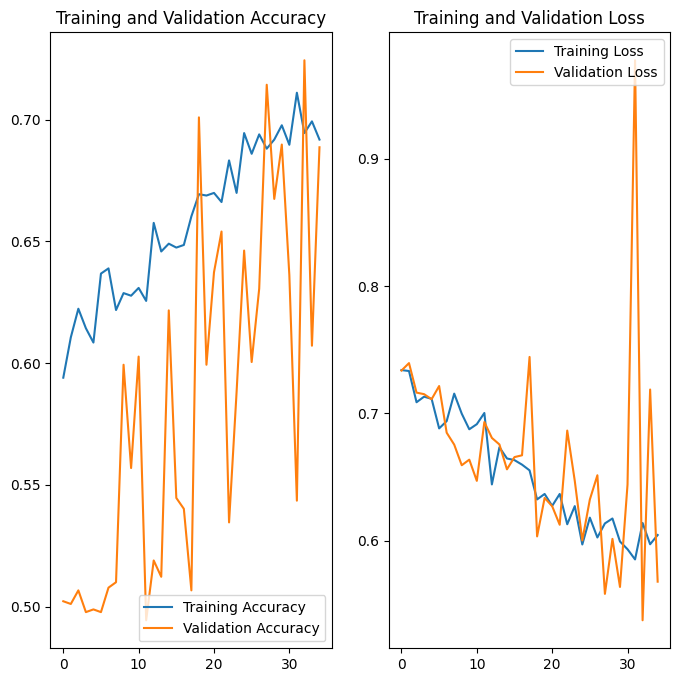

In [ ]:
# 9
epochs=35
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
len(test_data_gen)

0

In [ ]:
# Assuming you have trained the model and defined test_data_gen as your test data generator

# Predict probabilities for the test data
probabilities = model.predict_generator(test_data_gen, steps=len(test_data_gen), verbose=1)

# probabilities now contains the predicted probabilities for each class for each test sample


<ipython-input-13-75e7ce2a9ef7>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  probabilities = model.predict_generator(test_data_gen, steps=len(test_data_gen), verbose=1)


1/1 [==============================] - 1s 721ms/step


In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if np.round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 76.0% of the images of cats and dogs.
You passed the challenge!
